<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выбросы" data-toc-modified-id="Выбросы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выбросы</a></span><li><span><a href="#Перекодировка-признаков" data-toc-modified-id="Перекодировка-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Перекодировка признаков</a></span><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span><li><span><a href="#Замена-пропусков" data-toc-modified-id="Замена-пропусков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Замена пропусков</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Проверка-качества-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-качества-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка качества модели на тестовой выборке</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

**Задача**: спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 
Имеются исторические данные о поведении клиентов и расторжении договоров с банком.
Необходимо: 
1) построить модель с предельно большим значением F1-меры (чтобы сдать проект успешно, нужно довести метрику до 0.59).  
2) проверить F1-меру на тестовой выборке самостоятельно.  
3) дополнительно измерить AUC-ROC, сравнить её значение с F1-мерой.  

### Описание данных
Каждый объект в наборе данных — это информация о поведении клиентов. 

**Признаки**  
* `RowNumber` — индекс строки в данных  
* `CustomerId` — уникальный идентификатор клиента  
* `Surname` — фамилия  
* `CreditScore` — кредитный рейтинг  
* `Geography` — страна проживания  
* `Gender` — пол  
* `Age` — возраст  
* `Tenure` — сколько лет человек является клиентом банка  
* `Balance` — баланс на счёте  
* `NumOfProducts` — количество продуктов банка, используемых клиентом  
* `HasCrCard` — наличие кредитной карты  
* `IsActiveMember` — активность клиента  
* `EstimatedSalary` — предполагаемая зарплата  

**Целевой признак**
* `Exited` — факт ухода клиента  

### План  
1) Изучу данные. Проведу преобработку данных.  
2) Разделю исходные данные на обучающую, валидационную и тестовую выборки.  
3) Исследую баланс классов, обучу модели без учёта дисбаланса.  
4) Постараюсь улучшить качество модели, учитывая дисбаланс классов. Попробую обучить разные модели и найти лучшую.  
5) Проведу финальное тестирование и проверю качество модели на тестовой выборке.   

## Изучение данных из файла

In [1]:
import pandas as pd 
import numpy as np

# для графиков
import seaborn as sns
from matplotlib import pyplot as plt

# импорт моделей 
#from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

from sklearn.metrics import plot_confusion_matrix # для отрисовки матрицы ошибок

from sklearn.metrics import roc_curve # для построения ROC-AUC кривой

# для заполнения миссингов
from sklearn.impute import KNNImputer

# импорт метрик оценки качества моделей
from sklearn.metrics import accuracy_score # загрузим тоже
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
# два числа после запятой
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# читаем данные
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('Churn.csv')

In [4]:
# посмотрим на первые 5 строк
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [5]:
# посмотрим на общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# сколько миссингов
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

**Краткий вывод:**
В базе 10.000 записей. Большая часть переменных - числовые, кроме переменных `Surname`, `Geography` и `Gender`.  
В переменной `Tenure` (количество лет человек является клиентом банка) есть примерно 10% миссингов. Далее взглянем на эту переменную ближе и выясним - может быть это новые клиенты, которые сотрудничают с банком менее года. 

Также нужно будет привести названия столбцов к единому нижнему регистру. 

In [7]:
# приведем названия столбцов к единому нижнему регистру
data = data.rename(columns={'RowNumber': 'row_number', 'CustomerId': 'customer_id', 'Surname': 'surname', 
                            'CreditScore': 'credit_score', 'Geography': 'geography', 'Gender': 'gender', 
                            'Age': 'age', 'Tenure': 'tenure', 'Balance': 'balance', 'NumOfProducts': 'number_of_products',  
                            'HasCrCard': 'has_credit_card', 'IsActiveMember': 'is_active_member', 
                            'EstimatedSalary': 'estimated_salary', 'Exited': 'exited'})

In [8]:
# посмотрим на баланс классов 
data['exited'].value_counts(sort=False)

0    7963
1    2037
Name: exited, dtype: int64

In [9]:
# а сколько это в процентах?
data['exited'].value_counts(sort=False, normalize=True) * 100

0   79.63
1   20.37
Name: exited, dtype: float64

**Краткий вывод**. Видим, что в целевом признаке явных дисбаланс классов. 

Среди тех, кто ушел больше "неактивных" клиентов. А среди тех, кто еще сотрудничают с банком больше "активных" клиентов. 

In [10]:
# поиск дублей
data.duplicated().sum()

0

In [11]:
data['customer_id'].duplicated().sum()

0

Дублей в базе нет.

In [12]:
# посмотрим на описательную статистику
data[['credit_score', 'age', 'tenure', 'balance', 'number_of_products', 'estimated_salary']].describe()

,credit_score,age,tenure,balance,number_of_products,estimated_salary
count,"10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00"
mean,650.53,38.92,5.00,"76,485.89",1.53,"100,090.24"
std,96.65,10.49,2.89,"62,397.41",0.58,"57,510.49"
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,2.00,0.00,1.00,"51,002.11"
50%,652.00,37.00,5.00,"97,198.54",1.00,"100,193.91"
75%,718.00,44.00,7.00,"127,644.24",2.00,"149,388.25"
max,850.00,92.00,10.00,"250,898.09",4.00,"199,992.48"


**Кракий вывод**.  

* Итак, кредитный рейтинг клиентов варьирует от 350 до 850, средний рейтинг равен 650,53 (медианный - 652) при стандартном отклонении 96,65. 

* Средний возраст клиентов 39 лет (ст. откл. 10,49). Самому юному клиенту - 18 лет, самому взрослому - 92 года. Медианный возраст - 37 лет. 

* В среднем клиенты работают с банком 5 лет. Самый преданный клиент работает с банком 10 лет. 

* Баланс на счетах клинетов варьирует от 0 до примерно 251 тыс. руб. При этом медиана равна 97 тыс., а средний счет составляет приблизительно 77 тыс. (ст. откл 63 тыс.), что говорит о том, что у большинства клиентов на счету немного денег.  

* Как правило, клиенты пользуются только 1 продуктом банка, максимальное число используемых продуктов равно 4. 

* Предполагаемая зарплата варьирует от 11,58 (?) руб. до приблизительно 200 тыс. Среднее и медиана не сильно различаются. Средняя зарплата равна примерно 100 тыс., при ст.откл. - 57,5 тыс. 

Посмотрим на распределения этих переменных. 

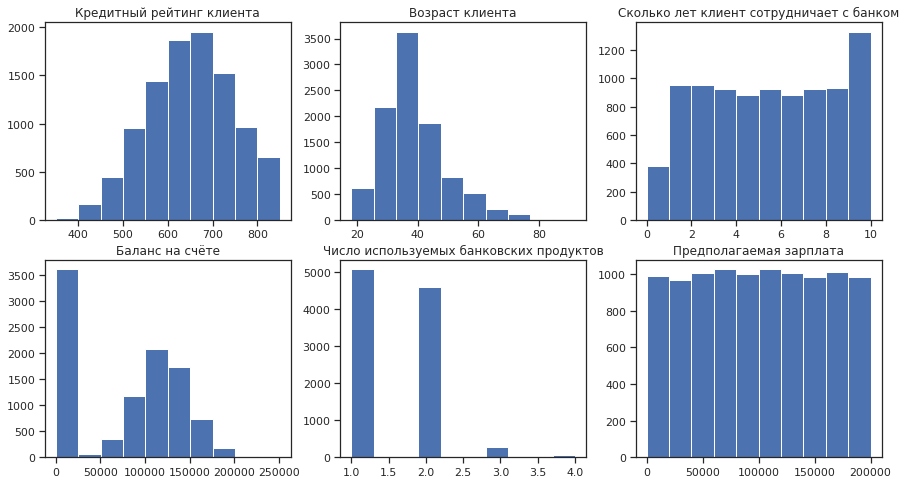

In [13]:
# посмотрим на распределения 

sns.set_theme(style="ticks")
fig, ax = plt.subplots(2, 3, figsize=(25,6))

ax[0][0].hist(x=data[['credit_score']])
ax[0][0].set_title('Кредитный рейтинг клиента')

ax[0][1].hist(x=data[['age']]) 
ax[0][1].set_title('Возраст клиента')

ax[0][2].hist(x=data[['tenure']]) 
ax[0][2].set_title('Сколько лет клиент сотрудничает с банком')

ax[1][0].hist(x=data[['balance']])
ax[1][0].set_title('Баланс на счёте')

ax[1][1].hist(x=data[['number_of_products']]) 
ax[1][1].set_title('Число используемых банковских продуктов')

ax[1][2].hist(x=data[['estimated_salary']]) 
ax[1][2].set_title('Предполагаемая зарплата')

fig.set_figwidth(15)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

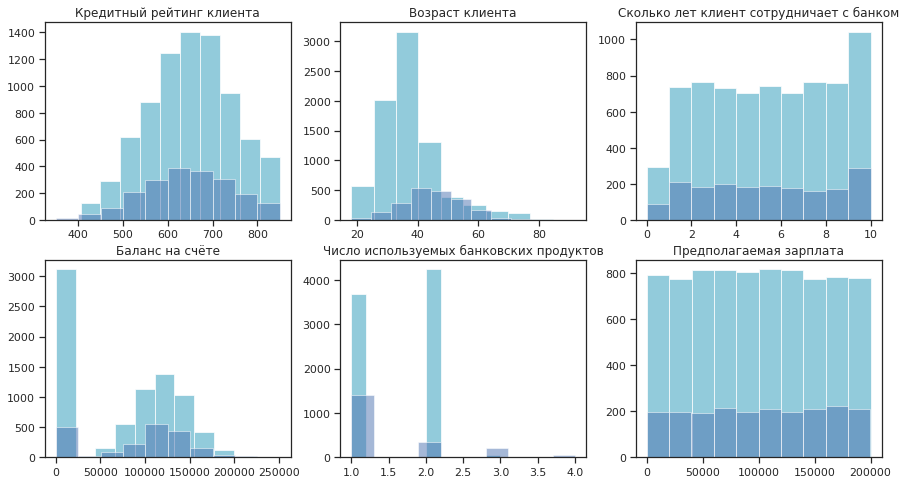

In [14]:
# посмотрим на распределения 

sns.set_theme(style="ticks")
fig, ax = plt.subplots(2, 3, figsize=(25,6))

ax[0][0].hist(x=data.query('exited == 0')[['credit_score']],alpha=0.7, color='c')
ax[0][0].hist(x=data.query('exited == 1')[['credit_score']],alpha=0.5, color='b')
ax[0][0].set_title('Кредитный рейтинг клиента')

ax[0][1].hist(x=data.query('exited == 0')[['age']],alpha=0.7, color='c') 
ax[0][1].hist(x=data.query('exited == 1')[['age']],alpha=0.5, color='b') 
ax[0][1].set_title('Возраст клиента')

ax[0][2].hist(x=data.query('exited == 0')[['tenure']],alpha=0.7, color='c') 
ax[0][2].hist(x=data.query('exited == 1')[['tenure']],alpha=0.5, color='b') 
ax[0][2].set_title('Сколько лет клиент сотрудничает с банком')

ax[1][0].hist(x=data.query('exited == 0')[['balance']],alpha=0.7, color='c')
ax[1][0].hist(x=data.query('exited == 1')[['balance']],alpha=0.5, color='b')
ax[1][0].set_title('Баланс на счёте')

ax[1][1].hist(x=data.query('exited == 0')[['number_of_products']],alpha=0.7, color='c')
ax[1][1].hist(x=data.query('exited == 1')[['number_of_products']],alpha=0.5, color='b')
ax[1][1].set_title('Число используемых банковских продуктов')

ax[1][2].hist(x=data.query('exited == 0')[['estimated_salary']],alpha=0.7, color='c') 
ax[1][2].hist(x=data.query('exited == 1')[['estimated_salary']],alpha=0.5, color='b') 
ax[1][2].set_title('Предполагаемая зарплата')

fig.set_figwidth(15)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

**Краткий вывод**.  

Распределения кредитного рейтинга и возраста близки к нормальному (у возраст с положительным скосом). 

Гистограмма переменной `balance` подтверждает гипотезу о том, что есть большая доля клинетов с небольшим балансом денег на счету (менее 50 тыс. руб.). Если отбросить часть этих клиентов, то распределение баланса на счету оставшихся клиентов будет похоже на нормальное распределение. 

Распределение переменной `estimated_salary` похоже на равномерную. Практически равномерное распределение напоминает и распределение переменной `tenure` (помним, что в этой переменной есть миссинги).  

Большинство клиентов пользуются 1-2 банковскими продуктами. Очень мало клиентов, которые используют 3 или 4 продукта. 


Посмотрим далее на оставшиеся переменные. 

In [15]:
data['gender'].value_counts(sort=False, normalize=True)

Male     0.55
Female   0.45
Name: gender, dtype: float64

Мужчин и женщин примерно одинаковое число.

In [16]:
# посмотрим в разрезе групп
data.groupby('exited')['gender'].value_counts(sort=False, normalize=True)

exited  gender
0       Female   0.43
        Male     0.57
1       Female   0.56
        Male     0.44
Name: gender, dtype: float64

Представители женского пола чаще уходят из банка. 

In [17]:
data['geography'].value_counts(sort=False, normalize=True)

France    0.50
Germany   0.25
Spain     0.25
Name: geography, dtype: float64

В базе есть данные о клиентах трех стран - Франции (половина клиентов), Германии и Испании.

In [18]:
# посмотрим в разрезе групп
data.groupby('exited')['geography'].value_counts(sort=False, normalize=True)

exited  geography
0       France      0.53
        Germany     0.21
        Spain       0.26
1       France      0.40
        Germany     0.40
        Spain       0.20
Name: geography, dtype: float64

Французов в группе тех, кто не уходит больше. В группе тех, кто уходит больше граждан Франции и Германии (по 40%)

In [19]:
data['has_credit_card'].value_counts(sort=False, normalize=True)

0   0.29
1   0.71
Name: has_credit_card, dtype: float64

Практически 71% клиентов имеют кредитные карты.

In [20]:
data.groupby('exited')['has_credit_card'].value_counts(sort=False, normalize=True)

exited  has_credit_card
0       0                 0.29
        1                 0.71
1       0                 0.30
        1                 0.70
Name: has_credit_card, dtype: float64

Здесь распределение по группам не отличаются. 

In [21]:
data['is_active_member'].value_counts(sort=False, normalize=True)

0   0.48
1   0.52
Name: is_active_member, dtype: float64

Активных и неактивных клиентов тоже распределились примерно поровну. 

In [22]:
data.groupby('exited')['is_active_member'].value_counts(sort=False, normalize=True)

exited  is_active_member
0       0                  0.45
        1                  0.55
1       0                  0.64
        1                  0.36
Name: is_active_member, dtype: float64

Среди тех, кто ушел больше "неактивных" клиентов. А среди тех, кто еще сотрудничают с банком больше "активных" клиентов. 

## Предобработка данных

Перейдем к преобработке данных:  
1) исследую на аномалии, удали аномальные значения из выборки   
2) перекодируем переменные `geography`, `gender`, `number_of_products`  
3) масштабируем переменные `credit_score`, `age`, `tenure`, `balance`, `estimated_salary`  
4) посмотрим на миссинги в переменной `tenure`.

### Выбросы

Посмотрим насколько разброс сильный у количественных переменных. И избавимся от аномалий.

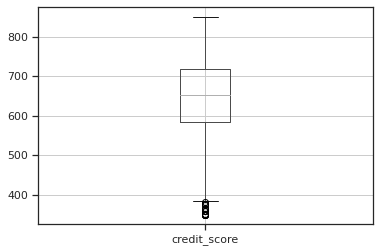

In [23]:
data[['credit_score']].boxplot();

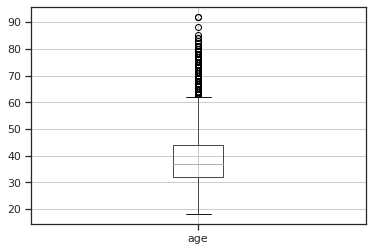

In [24]:
data[['age']].boxplot();

In [25]:
# удалим аномальные данные
q1 = data[['age']].quantile(0.25)
q3 = data[['age']].quantile(0.75)
iqr = q3 - q1

data['outlier_age'] = (
    data['age']
    .apply(lambda x: 
           True if ((x < (float(q1) - 2.5 * float(iqr))) or (x > (float(q3) + 2.5 * float(iqr)))) 
           else False)
)

In [26]:
data.drop(data[data['outlier_age'] == True].index, inplace=True)

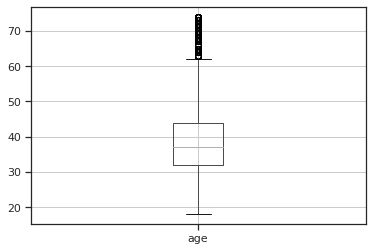

In [27]:
data[['age']].boxplot();

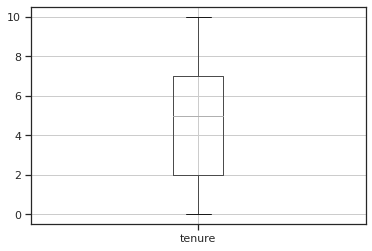

In [28]:
data[['tenure']].boxplot();

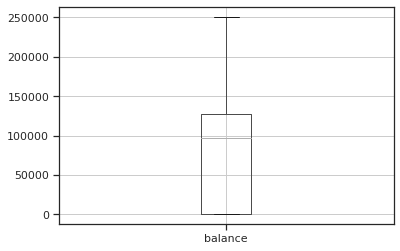

In [29]:
data[['balance']].boxplot();

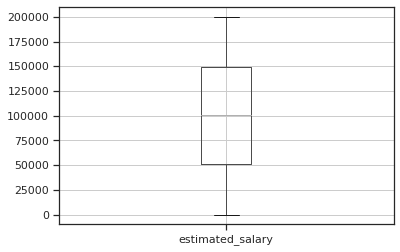

In [30]:
data[['estimated_salary']].boxplot();

Сильные выбросы были только в переменной `age`. Избавились от выбросов, чтобы в дальнейшем это не вызвало проблем с обучением моделей.  

### Перекодировка признаков

In [31]:
# оставим в датасете только те переменные, которые будут нужны для обучения моделей
data.drop(['row_number', 'customer_id', 'surname', 'outlier_age'], axis=1, inplace=True)

In [32]:
# оставим только те колонки, которые будем использовать для анализа
data.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'number_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [33]:
# перекодируем переменную 'number_of_products' в категориальную
data['number_of_products'] = data['number_of_products'].astype('category')

In [34]:
# проверим
data.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'number_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [35]:
# перекодируем `geography`, `gender`, `number_of_products`
data_ohe = pd.get_dummies(data, drop_first=True)

In [36]:
data_ohe.head()

,credit_score,age,tenure,balance,has_credit_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male,number_of_products_2,number_of_products_3,number_of_products_4
0,619,42,2.00,0.00,1,1,"101,348.88",1,0,0,0,0,0,0
1,608,41,1.00,"83,807.86",0,1,"112,542.58",0,0,1,0,0,0,0
2,502,42,8.00,"159,660.80",1,0,"113,931.57",1,0,0,0,0,1,0
3,699,39,1.00,0.00,0,0,"93,826.63",0,0,0,0,1,0,0
4,850,43,2.00,"125,510.82",1,1,"79,084.10",0,0,1,0,0,0,0


### Масштабирование признаков 

Для корректности сначала извлечем признаки и целевой признак, затем поделим исходные данные на обучающую, валидационную и тестовую.

In [37]:
# разделим выборку на обучающую и валидационную 
target = data_ohe['exited']
features = data_ohe.drop(['exited'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Разделила выборку на тренировочную, валидационную и тестовую. И соответственно поправила код ниже. 
</div>

In [38]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

In [39]:
# стандартизируем выборку
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])

# преобразуем валидационную и тренировочную выборки
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_37/2243149860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [40]:
display(features_train.head())

,credit_score,age,tenure,balance,has_credit_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,number_of_products_2,number_of_products_3,number_of_products_4
9742,0.66,0.62,-0.34,-1.23,1,1,-0.78,0,0,1,1,0,0
5591,-1.16,-0.07,0.00,-1.23,1,0,-0.92,0,0,1,1,0,0
5826,-1.47,-0.97,-1.73,0.50,1,1,-0.13,1,0,0,1,0,0
6131,0.36,2.11,1.39,-1.23,1,1,-0.43,0,0,1,0,1,0
8476,0.52,1.22,1.39,-1.23,0,0,-0.66,0,0,1,1,0,0


### Замена пропусков 

Проверю как связан признак `'tenure'` с другими признаками. Связи буду проверять в исходном датасете `data`. В случае, если решу `заглушить` миссинги, то буду работать с датасетами `feautures_train`, `features_valid`, `features_test`. 

In [41]:
data['tenure'].value_counts(dropna=False)

1.00     948
2.00     942
8.00     929
3.00     925
7.00     922
5.00     920
NaN      905
4.00     882
9.00     878
6.00     874
10.00    440
0.00     381
Name: tenure, dtype: int64

Итак, в базе есть и 0, и `nan`. Посмотрим на описательную статистику по данным, где `'tenure'` равно `nan`.

In [42]:
(
    data
    .loc[data['tenure']
         .isna(), ['credit_score', 'age', 'tenure', 'balance', 'number_of_products', 'estimated_salary']]
    .describe()
)

,credit_score,age,tenure,balance,estimated_salary
count,905.00,905.00,0.00,905.00,905.00
mean,648.50,38.47,NaN,"76,150.28","99,027.52"
std,99.13,9.40,NaN,"63,161.65","56,404.69"
min,359.00,18.00,NaN,0.00,106.67
25%,580.00,32.00,NaN,0.00,"49,865.04"
50%,647.00,37.00,NaN,"96,674.55","98,060.51"
75%,718.00,43.00,NaN,"128,647.98","145,759.70"
max,850.00,74.00,NaN,"206,663.75","199,390.45"


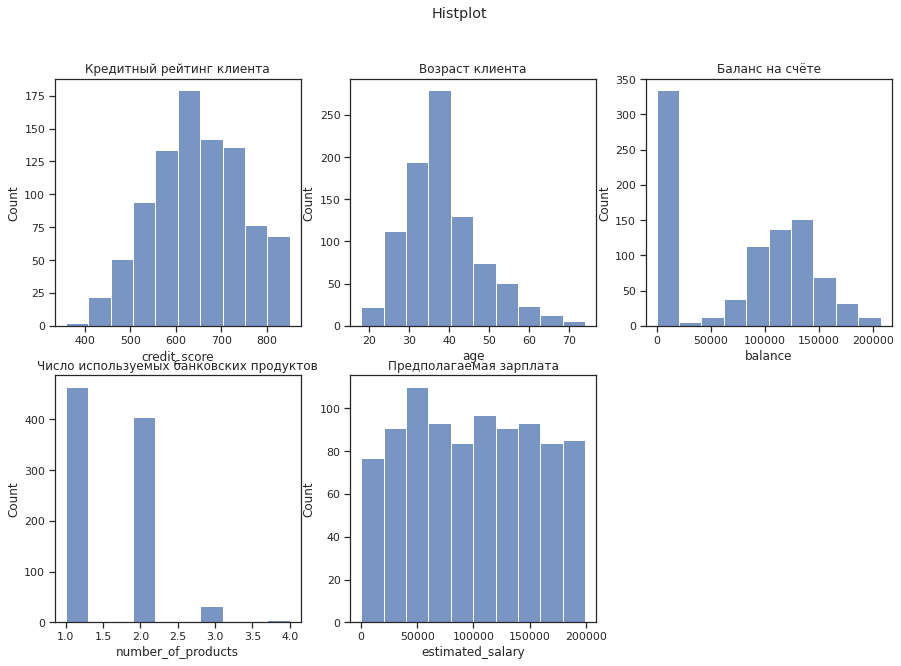

In [43]:
# посмотрим на распределения 

data_nan = data[data['tenure'].isna()].copy()

fig = plt.figure(figsize=(15,10))

ax_1 = fig.add_subplot(2, 3, 1)
ax_2 = fig.add_subplot(2, 3, 2)
ax_3 = fig.add_subplot(2, 3, 3)
ax_4 = fig.add_subplot(2, 3, 4)
ax_5 = fig.add_subplot(2, 3, 5)

axes = [ax_1, ax_2, ax_3, ax_4, ax_5]


sns.histplot(data_nan['credit_score'], ax=ax_1, bins=10)
sns.histplot(data_nan['age'], ax=ax_2, bins=10)
sns.histplot(data_nan['balance'], ax=ax_3, bins=10)
sns.histplot(data_nan['number_of_products'].astype('int'), ax=ax_4, bins=10)
sns.histplot(data_nan['estimated_salary'], ax=ax_5, bins=10)

ax_1.set(title = 'Кредитный рейтинг клиента')
ax_2.set(title = 'Возраст клиента')
ax_3.set(title = 'Баланс на счёте')
ax_4.set(title = 'Число используемых банковских продуктов')
ax_5.set(title = 'Предполагаемая зарплата')

fig.suptitle('Histplot');

In [44]:
data[data['tenure'].isna()].head()

,credit_score,geography,gender,age,tenure,balance,number_of_products,has_credit_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,"140,469.38",1
48,550,Germany,Male,38,NaN,"103,391.38",1,0,1,"90,878.13",0
51,585,Germany,Male,36,NaN,"146,050.97",2,0,0,"86,424.57",0
53,655,Germany,Male,41,NaN,"125,561.97",1,0,0,"164,040.94",1
60,742,Germany,Male,35,NaN,"136,857.00",1,0,0,"84,509.57",0


In [45]:
(
    data
    .loc[data['tenure']
         .isna(), 'exited']
    .value_counts(sort=False, normalize=True)
)

0   0.80
1   0.20
Name: exited, dtype: float64

In [46]:
(
    data
    .loc[data['tenure']
         .isna(), 'gender']
    .value_counts(sort=False, normalize=True)
)

Male     0.53
Female   0.47
Name: gender, dtype: float64

In [47]:
(
    data
    .loc[data['tenure']
         .isna(), 'geography']
    .value_counts(sort=False, normalize=True)
)

Spain     0.25
France    0.51
Germany   0.24
Name: geography, dtype: float64

In [48]:
(
    data
    .loc[data['tenure']
         .isna(), 'has_credit_card']
    .value_counts(sort=False, normalize=True)
)

0   0.29
1   0.71
Name: has_credit_card, dtype: float64

In [49]:
(
    data
    .loc[data['tenure']
         .isna(), 'is_active_member']
    .value_counts(sort=False, normalize=True)
)

0   0.49
1   0.51
Name: is_active_member, dtype: float64

**Краткий вывод.**  Итак, видим, что подвыборка с `nan` практически не отличается от общей картины. 

В общем я в замешательстве, что делать с миссингами. Есть заменить медианой или средним значением, то очевидно, что это отразится на распределении. 

Попробую посмотреть на медиану и средние значения переменной `tenure` в зависимости от страны, возраста, пола.

In [50]:
data[['geography', 'tenure']].groupby('geography').agg(['mean', 'median'])

tenure       
            mean median
geography              
France      5.00   5.00
Germany     4.98   5.00
Spain       5.00   5.00

In [51]:
data[['gender', 'tenure']].groupby('gender').agg(['mean', 'median'])

tenure       
         mean median
gender              
Female   4.96   5.00
Male     5.03   5.00

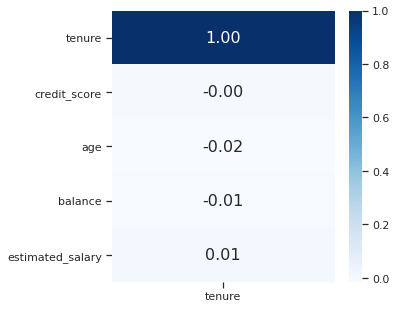

In [52]:

plt.figure(figsize=(5,5))
(
    sns.heatmap(data[['tenure', 'credit_score', 'age', 'balance', 'number_of_products', 'estimated_salary']]
                .corr()[['tenure']], 
                annot=True, 
                cmap="Blues", 
                fmt='.2f', 
                annot_kws={'size':16})
);



In [53]:
print(
    data
    .groupby('exited')['tenure']
    .agg(['mean', 'median'])
)
print()
print(
    data
    .groupby('gender')['tenure']
    .agg(['mean', 'median'])
)
print()
print(
    data
    .groupby('geography')['tenure']
    .agg(['mean', 'median'])
)
print()
print(
    data
    .groupby('has_credit_card')['tenure']
    .agg(['mean', 'median'])
)
print()
print(
    data
    .groupby('is_active_member')['tenure']
    .agg(['mean', 'median'])
)

        mean  median
exited              
0       5.02    5.00
1       4.90    5.00

        mean  median
gender              
Female  4.96    5.00
Male    5.03    5.00

           mean  median
geography              
France     5.00    5.00
Germany    4.98    5.00
Spain      5.00    5.00

                 mean  median
has_credit_card              
0                4.88    5.00
1                5.05    5.00

                  mean  median
is_active_member              
0                 5.09    5.00
1                 4.90    5.00


В общем, как-то так. И связи между `tenure` и остальными переменными нет. Удалять практически 10% данных не хочется.  
В общем, после поиска решения в интернете, решила воспользоваться `KNNImputer` из библиотеки `sklearn.impute`. 

In [54]:
# добавим столбец - булевый признак, который указывает в каких строках переменной `tenure` были миссинги. 
features_train_original = features_train.copy()
features_train['tenure_was_nan'] = features_train['tenure'].apply(lambda x: 0 if np.isnan(x) else 1) 

/tmp/ipykernel_37/814519607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train['tenure_was_nan'] = features_train['tenure'].apply(lambda x: 0 if np.isnan(x) else 1)


In [55]:
features_train['tenure_was_nan'].value_counts()

1    6313
0     649
Name: tenure_was_nan, dtype: int64

In [56]:
features_train.loc[features_train['tenure'].isna(), ['tenure', 'tenure_was_nan']].head(3)

,tenure,tenure_was_nan
7256,NaN,0
6439,NaN,0
7293,NaN,0


In [57]:
features_train.loc[~features_train['tenure'].isna(), ['tenure', 'tenure_was_nan']].head(3)

,tenure,tenure_was_nan
9742,-0.34,1
5591,0.00,1
5826,-1.73,1


Ура! Сделали. А теперь заменим пропуски.

In [58]:
# ПОМЕНЯЛА!

imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(features_train[numeric]) 
features_train[numeric] = imputer.transform(features_train[numeric])

/tmp/ipykernel_37/1992494488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = imputer.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [59]:
# преобразуем валидационную и тренировочную выборки
features_valid[numeric] = imputer.transform(features_valid[numeric])
features_test[numeric] = imputer.transform(features_test[numeric])

In [60]:
features_train.head()

,credit_score,age,tenure,balance,has_credit_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male,number_of_products_2,number_of_products_3,number_of_products_4,tenure_was_nan
9742,0.66,0.62,-0.34,-1.23,1,1,-0.78,0,0,1,1,0,0,1
5591,-1.16,-0.07,0.00,-1.23,1,0,-0.92,0,0,1,1,0,0,1
5826,-1.47,-0.97,-1.73,0.50,1,1,-0.13,1,0,0,1,0,0,1
6131,0.36,2.11,1.39,-1.23,1,1,-0.43,0,0,1,0,1,0,1
8476,0.52,1.22,1.39,-1.23,0,0,-0.66,0,0,1,1,0,0,1


In [61]:
features_train.isna().sum()

credit_score            0
age                     0
tenure                  0
balance                 0
has_credit_card         0
is_active_member        0
estimated_salary        0
geography_Germany       0
geography_Spain         0
gender_Male             0
number_of_products_2    0
number_of_products_3    0
number_of_products_4    0
tenure_was_nan          0
dtype: int64

Вроде бы получилось. Произведем замену в исходном датасете + в исходный датасет добавим новую переменную, которая будет указывать в каких строках переменной `tenure` были миссинги.

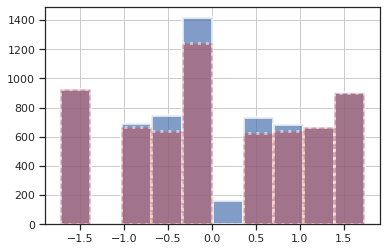

In [62]:
# посмотрим на распределение `tenure` с вмененными значениями и исходные
features_train['tenure'].hist(alpha = 0.7, lw=3, color= 'b')
features_train_original['tenure'].hist(ls='dotted', alpha = 0.5, lw=3, color='r');

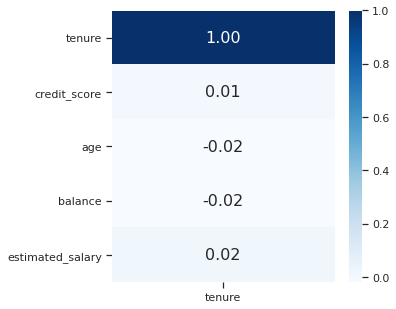

In [63]:
# проверим корреляции 
plt.figure(figsize=(5,5))
(
    sns.heatmap(features_train[['tenure', 'credit_score', 'age', 'balance', 'estimated_salary']]
                .corr()[['tenure']], 
                annot=True, 
                cmap="Blues", 
                fmt='.2f', 
                annot_kws={'size':16})
);

In [64]:
print(pd.concat([features_train[['tenure']], target_train], axis=1)
      .groupby('exited').agg(['mean', 'median']))
print()
print(
    pd.concat([features_train_original[['tenure']], target_train], axis=1)
    .groupby('exited')['tenure']
    .agg(['mean', 'median'])
)

       tenure       
         mean median
exited              
0        0.01   0.00
1       -0.03   0.00

        mean  median
exited              
0       0.01    0.00
1      -0.03    0.00


**Краткий вывод**

При предобработке данных проведена замена миссингов в признаке `tenure` с помощью команды `KNNImputer()`.   

С `OHE` были перекодированы категориальные признаки. 

Далее, количественные переменные были стандартизированы и приведены к единому масштабу. Перед этим, выборка была поделена на обучающую и валидационную выборки. 

Давайте перейдем к исследовательскому анализу. Будем работать с датасетом `data_knn`

## Исследовательский анализ

В этом пункте посмотрим на корреляции между признаками, чтобы понять какие признаки оставить. 

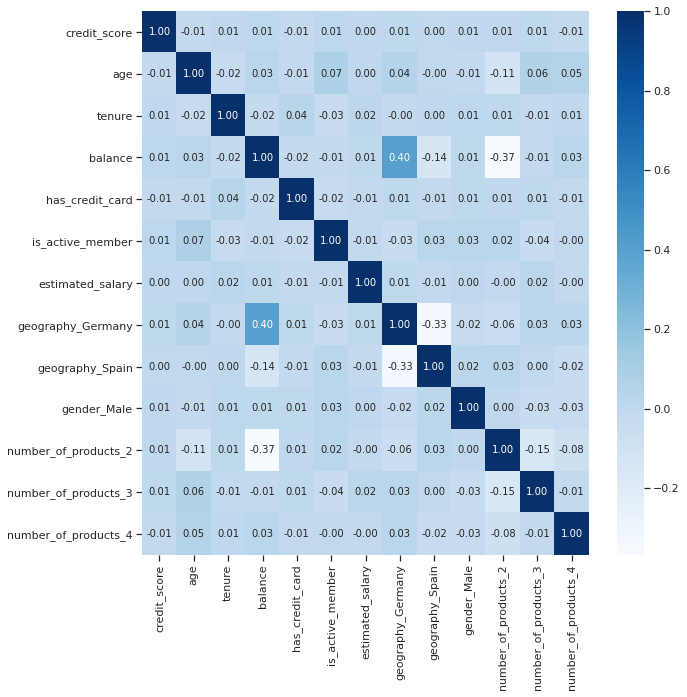

In [65]:
# проверим как скоррелированы переменные друг с другом. 
# если есть сильные корреляции, то исключим из анализа некоторые переменные

plt.figure(figsize=(10,10))
(
    sns.heatmap(features_train.drop('tenure_was_nan', axis=1)
                .corr(), 
                annot=True, 
                cmap="Blues", 
                fmt='.2f', 
                annot_kws={'size':10})
);

**Краткий вывод** 

Как видно из диаграммы `heatmap` все корреляции между признаками меньше `0,5`. Все признаки можно оставить и использовать при построении модели. 

## Обучение моделей

*Целевой признак* - ушел клиент из банка. Категориальная переменная. Поэтому будем использовать методы классификации.

Я буду в этом проекте обучу две модели: Random Forest Classification и Logistic Regression. 
Сначала обучу модели без учета дисбаланса. Посмотрю на значения метрик. 

Затем постараюсь улучшить качество модели, учитывая дисбаланс классов. Попробую определить гиперпараметры, которые дают лучшие показатели метрики F1-score на валидационной выборке.

### Логистическая регрессия 

Обучим логистическую регрессию без учета дисбаланса. 

In [66]:
features_train.drop('tenure_was_nan', axis=1, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
logistic = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000) # зададим модель
logistic.fit(features_train, target_train) # обучим модель
predicted_valid = logistic.predict(features_valid)

In [68]:
# проверим метрики f1-score, accuracy, precision, recall

print('F1-score logistic-модели без учета дисбаланса равно:',\
      f1_score(target_valid, predicted_valid).round(2)) # проверим качество модели
print()
print('Accuracy logistic-модели без учета дисбаланса равно:',\
      accuracy_score(target_valid, predicted_valid).round(2))
print()
print('Precision logistic-модели без учета дисбаланса равно:',\
      precision_score(target_valid, predicted_valid).round(2))
print()
print('Recall logistic-модели без учета дисбаланса равно:',\
      recall_score(target_valid, predicted_valid).round(2))

F1-score logistic-модели без учета дисбаланса равно: 0.52

Accuracy logistic-модели без учета дисбаланса равно: 0.84

Precision logistic-модели без учета дисбаланса равно: 0.71

Recall logistic-модели без учета дисбаланса равно: 0.41


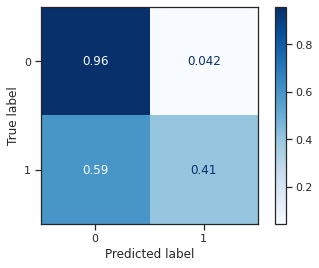

In [69]:
# построим матрицу ошибок
plot_confusion_matrix(estimator=logistic, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

Метрика `f1-score` равна `0,52`. Наша модель, как и ожидалось, хорошо предсказывает отрицательные значения (клиент не уйдет из банка) - 0,96. За счет этого и показатель `accuracy` получился высоким. Но положительные предсказывает не очень хорошо, менее 41%. 

Теперь добавим в модель параметр `class_weight='balanced'`, который позволит алгоритм посчитать, во сколько раз группа `0` встречается чаще группы `1`.

In [70]:
logistic = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000, class_weight='balanced') # зададим модель
logistic.fit(features_train, target_train) # обучим модель
predicted_valid = logistic.predict(features_valid)

In [71]:
# проверим метрики f1-score, accuracy, precision, recall

print('F1-score logistic-модели с параметром class_weight="balanced" равно:',\
      f1_score(target_valid, predicted_valid).round(2)) # проверим качество модели
print()
print('Accuracy logistic-модели с параметром class_weight="balanced" равно:',\
      accuracy_score(target_valid, predicted_valid).round(2))
print()
print('Precision logistic-модели с параметром class_weight="balanced" равно:',\
      precision_score(target_valid, predicted_valid).round(2))
print()
print('Recall logistic-модели с параметром class_weight="balanced" равно:',\
      recall_score(target_valid, predicted_valid).round(2))

F1-score logistic-модели с параметром class_weight="balanced" равно: 0.56

Accuracy logistic-модели с параметром class_weight="balanced" равно: 0.76

Precision logistic-модели с параметром class_weight="balanced" равно: 0.45

Recall logistic-модели с параметром class_weight="balanced" равно: 0.75


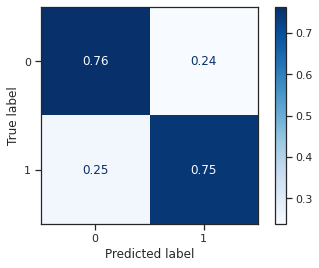

In [72]:
# построим матрицу ошибок
plot_confusion_matrix(estimator=logistic, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

Метрика `f1-score` повысилась с `0,51` до `0.56`. Показатели метрки `accuracy` и `precision` снизились, но показатель полноты `recall` повысился. Иными словами, доля TP-ответов, которые выделила модель среди всех, у которых истинная метка 1, повысилась, что также видим из матрицы ошибок.

Попробуем подобрать гиперпараметры для логистической модели с помощью `GridSearchCV`.

In [73]:
tuned_parameters = [{'penalty':['l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

logistic_gsc = GridSearchCV(LogisticRegression(random_state=12345, max_iter=1000, class_weight='balanced'), 
                            tuned_parameters, cv=5, scoring="f1", n_jobs=4)

In [74]:
result = logistic_gsc.fit(features_train, target_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: Fi

In [75]:
# посмотрим на результаты
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5683800371704394
Best Hyperparameters: {'C': 10}


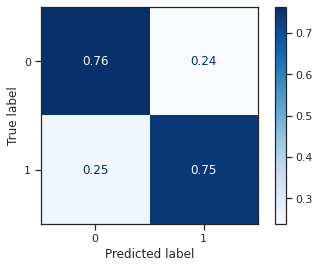

In [76]:
# построим матрицу ошибок

predicted_valid_gsc = logistic_gsc.predict(features_valid)
plot_confusion_matrix(estimator=logistic_gsc, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

In [77]:
print('F1-score равно:',\
      f1_score(target_valid, predicted_valid_gsc).round(2)) # проверим качество модели
print()
print('Accuracy равно:',\
      accuracy_score(target_valid, predicted_valid_gsc).round(2))
print()
print('Precision равно:',\
      precision_score(target_valid, predicted_valid_gsc).round(2))
print()
print('Recall равно:',\
      recall_score(target_valid, predicted_valid_gsc).round(2))

F1-score равно: 0.56

Accuracy равно: 0.76

Precision равно: 0.45

Recall равно: 0.75


Проделанная работа с поиском гиперпараметров не позволила повысить `f1-score`. Попробуем поработать с устранением дисбаланса и сначала увеличим выборку с помощью `upsampling`. 

In [78]:
# создадим функцию для увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [79]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

logistic = LogisticRegression(random_state=12345, solver='liblinear', C=10)
logistic.fit(features_upsampled, target_upsampled)

predicted_valid = logistic.predict(features_valid)

print("F1 на валидационной выборке:", f1_score(target_valid, predicted_valid))

F1 на валидационной выборке: 0.47877758913412566


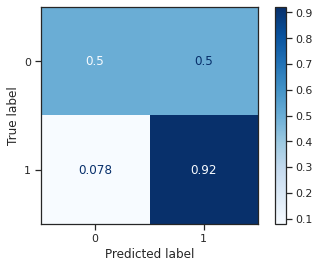

In [80]:
plot_confusion_matrix(estimator=logistic, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

Как-то странно, `f1-score` уменьшился. 🤔 Хотя при этом наша модель стала лучше предсказывать положительные значения (клиент уйдет из банка), но снизилось аккуратность предсказания отрицательных значений (группа 0 - клиент останется в банке). 

А если наоборот, уменьшить выборку. 

In [81]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [82]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

logistic = LogisticRegression(random_state=12345, solver='liblinear', C=10)
logistic.fit(features_downsampled, target_downsampled)
predicted_valid = logistic.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4746621621621622


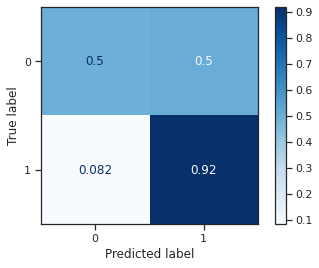

In [83]:
plot_confusion_matrix(estimator=logistic, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

Результат получился таким же, как и при увеличении выборки. `F1-score` не улучшился. 

Пока самый лучший показатель `f1-score`, который получился равен `0,56`. Модель `LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000, class_weight='balanced')`.

### Случайный лес

Попробуем обучить модель `Random Forest`. 

In [110]:
forest = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

rf_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}


forest_gsc = GridSearchCV(forest, rf_grid, scoring = 'f1', cv = 5, n_jobs=4)

# fit the model
result = forest_gsc.fit(features_train, target_train)

In [112]:
# посмотрим на результаты
print('Random Forest Classifier лучшее значение метрики f1-score: %s' % result.best_score_)
print('Random Forest Classifier лучшие гиперпараметры: %s' % result.best_params_)

Random Forest Classifier лучшее значение метрики f1-score: 0.5838670635329928
Random Forest Classifier лучшие гиперпараметры: {'max_depth': 110, 'n_estimators': 60}


Значение `f1-score` повысилось. Посмотрим какое значени принимает `f1-score` на валидационной выборке. 

In [113]:
predicted_valid_gsc = forest_gsc.predict(features_valid)

In [114]:
print('F1-score forest_gsc-модели равно:',\
      f1_score(target_valid, predicted_valid_gsc).round(2)) # проверим качество модели
print()
print('Accuracy forest_gsc-модели равно:',\
      accuracy_score(target_valid, predicted_valid_gsc).round(2))
print()
print('Precision forest_gsc-модели равно:',\
      precision_score(target_valid, predicted_valid_gsc).round(2))
print()
print('Recall forest_gsc-модели равно:',\
      recall_score(target_valid, predicted_valid_gsc).round(2))

F1-score forest_gsc-модели равно: 0.61

Accuracy forest_gsc-модели равно: 0.87

Precision forest_gsc-модели равно: 0.82

Recall forest_gsc-модели равно: 0.49


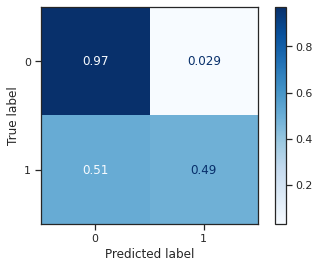

In [115]:
plot_confusion_matrix(estimator=forest_gsc, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

Значение f1-score на валидационной выборке выше и равно `0.6`. 

Значение метрики `recall` невысокая. 

Как видим, из матрицы ошибок, модель отлично предсказывает отрицательные значения (группа 0), но аккуратность предсказаний положительных значений (группа 1) меньше 50%. 

Далее попробуем сбалансировать выборку и посмотрим на значения `f1-score`. Будем использовать модель `RandomForestClassifier` с гиперпараметрами, найденными при помощи `GridSearchCv`.

In [118]:
forest = RandomForestClassifier(n_estimators=110, max_depth=60, random_state=12345)

forest.fit(features_train, target_train)
predicted_valid = forest.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))



F1: 0.6024096385542168


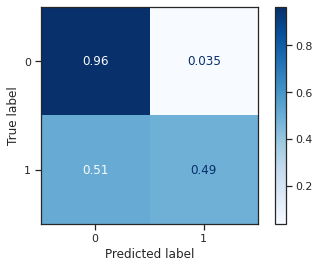

In [119]:
plot_confusion_matrix(estimator=forest, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

`F1-score` достигла `0,60`. Но как видно из матрицы ошибок, аккуратность предсказания положительных значений меньше 50%. 

Попробуем обучить модель на сбалансированных выборках. 

In [120]:
# посмотрим на уменьшенной выборке
forest.fit(features_downsampled, target_downsampled)
predicted_valid = forest.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4900086880973067


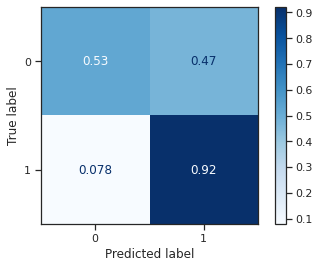

In [121]:
plot_confusion_matrix(estimator=forest, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

При уменьшении выборки и обучении модели на ней только уменьшили показатель `f1-score`. Точность предсказания положительных значений довольно высока - `0,92`, однако отрицательные значения предсказывают только в 53% случаев.  

Давайте проверим какое значени `f1-score` примет, если обучить модель на увеличенной выборке. 

In [122]:
forest.fit(features_upsampled, target_upsampled)
predicted_valid = forest.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6219081272084805


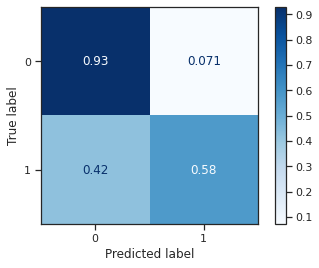

In [123]:
plot_confusion_matrix(estimator=forest, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

In [124]:
print('Accuracy forest-модели равно:',\
      accuracy_score(target_valid, predicted_valid).round(2))
print()
print('Precision forest-модели равно:',\
      precision_score(target_valid, predicted_valid).round(2))
print()
print('Recall forest-модели равно:',\
      recall_score(target_valid, predicted_valid).round(2))

Accuracy forest-модели равно: 0.86

Precision forest-модели равно: 0.68

Recall forest-модели равно: 0.58


Метрика `f1-score` получилась в этом случае самой высокой и достигает на валидационной выборке `0,62`. Хотя `recall` равен `0,58`. 
Проверим какое значение пример `f1-score` для тестовой выборки. 

## Проверка качества модели на тестовой выборке

In [125]:
# обучите модель на тестовой выборке
# forest.fit(features_train, target_train) 

predicted_train = forest.predict(features_test)

print("F1-score наилучшей модели на тестовой выборке:", 
      f1_score(target_test, predicted_train).round(2)) # оценим качество

F1-score наилучшей модели на тестовой выборке: 0.59


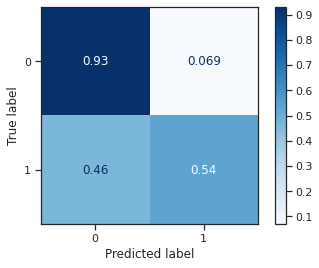

In [126]:
plot_confusion_matrix(estimator=forest, X=features_test, y_true=target_test,
                      normalize='true', cmap='Blues');


`F1-score` на тестовой выборке достигла `0,59`. 

Хотя `recall` небольшой. Наша модель предсказывает группу 1 с точность 0,54. 

Дополнительно измерим AUC-ROC. 

In [127]:
# ПОПРАВИЛА с VALID на TEST

probabilities_test = forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# < напишите код здесь >
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8403820468584784


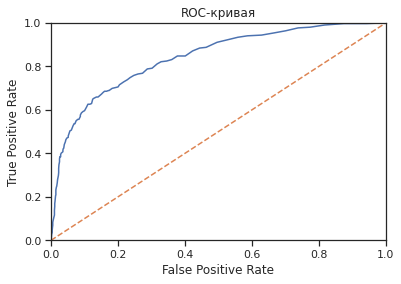

In [128]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

# < постройте график >
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# подписшем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# добавим заголовки
plt.title("ROC-кривая")
plt.show()

Проверим еще важность полученных весов. 

In [129]:
forest.feature_importances_

array([0.14219812, 0.2213265 , 0.09429083, 0.15186448, 0.01752437,
       0.0329141 , 0.14505227, 0.02707613, 0.0154485 , 0.02020371,
       0.10801935, 0.01858465, 0.00549698])

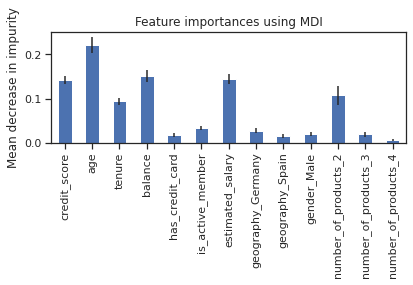

In [130]:
feature_names = features_test.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout();

Если смотреть на веса признаков, то наиболее важными признаками являются возраст (`age`), кредитный рейтинг (`credit_score`), баланс банковского счета (`balance`) и предполагаемая зарплата (`estimated_salary`).

## Общий вывод

Итак, в этом проекте мы построили модель RandomForestClassifier(n_estimators=110, max_depth=70, random_state=12345) со значением `f1-score` `0,59` на тестовой выборке. ROC-AUC равен `0,84`. 